In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import sys
import numpy as np
import matplotlib.pyplot as plt

# Path to SledgeHAMR top directory
sys.path.append('../../')
import pySledgehamr as sh

### Create Initial State

In [25]:
strings = sh.AxionStrings()
#strings.CreateInitialState(L=23, N=128, k_max=5, t_start=0.1, output_file='initial_state.hdf5') 

### Read Output

In [26]:
out = sh.Output('output')

print()

times = out.GetTimesOfSlices()
print('Slices written at t =', times)

times = out.GetTimesOfCoarseBoxes()
print('Coarse boxes written at t =', times)

Number of slices found:  5
Number of coarse boxes found:  5

Slices written at t = [0.13515625 0.6625     1.18984375 1.7171875  2.24453125]
Coarse boxes written at t = [0.13515625 0.6625     1.18984375 1.7171875  2.24453125]


## Plot Slice

t=2.24453125


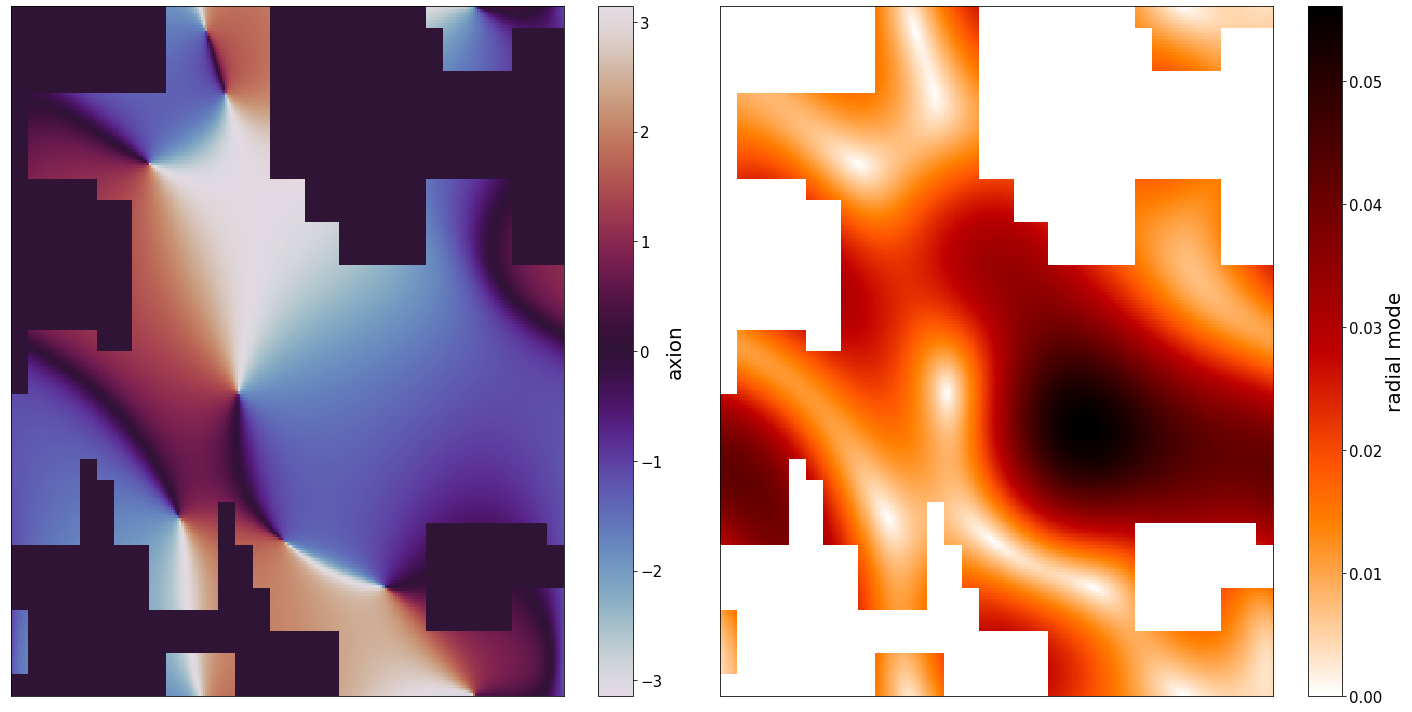

In [32]:
# id of slice to be plotted
i = 4
lev = 1

# Read Slice
slices = out.GetSlice(i, 'x', lev, ['Psi1', 'Psi2'])
t = slices['t']
print('t='+str(t))

axion = np.arctan2(slices['Psi2'], slices['Psi1'])
radial_mode = np.sqrt(slices['Psi1']**2 + slices['Psi2']**2)

# Plot
fig, ax = plt.subplots(figsize=(20,10),ncols=2)

dim = np.shape(axion)[0]
axis = np.linspace(0,1,dim)
im = ax[0].pcolormesh(axis,axis,axion,
                      cmap='twilight',vmin=-np.pi,vmax=np.pi)
cb = fig.colorbar(im, ax=ax[0])
cb.ax.tick_params(labelsize=15)
cb.set_label(label='axion',fontsize=20)
ax[0].set_xticks([])
ax[0].set_yticks([])

im = ax[1].pcolormesh(axis,axis,radial_mode,cmap='gist_heat_r')
cb = fig.colorbar(im, ax=ax[1])
cb.ax.tick_params(labelsize=15)
cb.set_label(label='radial mode',fontsize=20)
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.tight_layout()

t=2.24453125


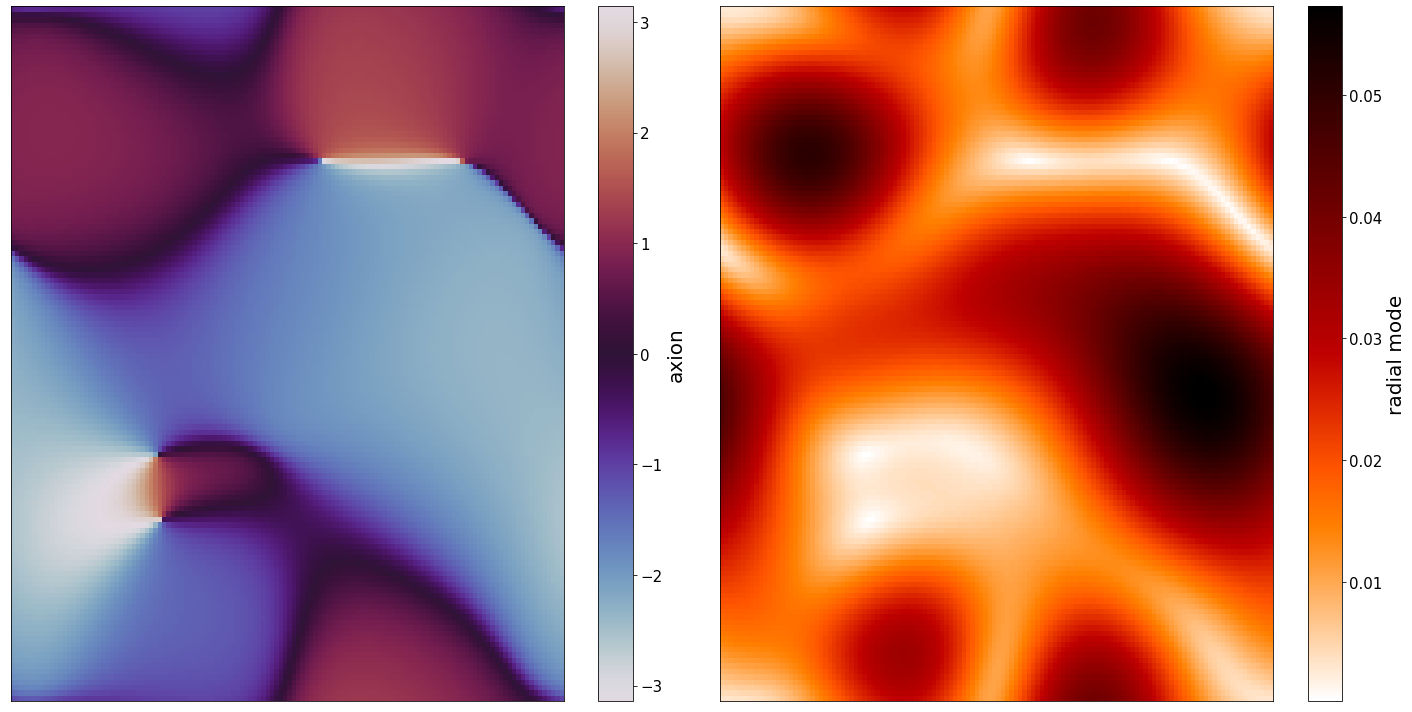

In [31]:
# Id of coarse box to be plotted
i = 4

# Read coarse box and grab a slice.
coarse_box = out.GetCoarseBox(i, ['Psi1', 'Psi2'])
t = coarse_box['t']
print('t='+str(t))

axion = np.arctan2(coarse_box['Psi2'][:,:,0], coarse_box['Psi1'][:,:,0])
radial_mode = np.sqrt(coarse_box['Psi1'][:,:,0]**2 + coarse_box['Psi2'][:,:,0]**2)

# Plot
fig, ax = plt.subplots(figsize=(20,10),ncols=2)

dim = np.shape(axion)[0]
axis = np.linspace(0,1,dim)
im = ax[0].pcolormesh(axis,axis,axion,
                      cmap='twilight',vmin=-np.pi,vmax=np.pi)
cb = fig.colorbar(im, ax=ax[0])
cb.ax.tick_params(labelsize=15)
cb.set_label(label='axion',fontsize=20)
ax[0].set_xticks([])
ax[0].set_yticks([])

im = ax[1].pcolormesh(axis,axis,radial_mode,cmap='gist_heat_r')
cb = fig.colorbar(im, ax=ax[1])
cb.ax.tick_params(labelsize=15)
cb.set_label(label='radial mode',fontsize=20)
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.tight_layout()